In [1]:
import ipywidgets as widgets
from skimage import io
from skimage.color import rgb2grey
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [2]:
#USER THINGS

selector = widgets.Dropdown(
    options=[('Scout View', 'photos/img1.jpg'), ('Scout View (large)', 'photos/img2.jpg'), ('Circle', 'photos/img3.jpg')],
    value='photos/img1.jpg',
    description='Image:',
)


slider_alpha = widgets.IntSlider(
    value=3,
    min=0,
    max=360,
    step=1,
    description='Alpha:',
    continuous_update=False,
    readout_format='d'
)

slider_n = widgets.IntSlider(
    value=10,
    min=0,
    max=100,
    step=1,
    description='Number n:',
    continuous_update=False,
    readout_format='d'
)

slider_l = widgets.IntSlider(
    value=3,
    min=0,
    max=100,
    step=1,
    description='Spread l [%]:',
    continuous_update=False,
    readout_format='d'
)

display(selector, slider_alpha, slider_n, slider_l)

Dropdown(description='Image:', options=(('Scout View', 'photos/img1.jpg'), ('Scout View (large)', 'photos/img2…

IntSlider(value=3, continuous_update=False, description='Alpha:', max=360)

IntSlider(value=10, continuous_update=False, description='Number n:')

IntSlider(value=3, continuous_update=False, description='Spread l [%]:')

In [3]:
def make_square(path, show_img=False):
    img = io.imread(path)
    short_egde = min(img.shape[:2])
    yy = int((img.shape[0] - short_egde) / 2)
    xx = int((img.shape[1] - short_egde) / 2)
    crop_img = img[yy : yy + short_egde, xx : xx + short_egde]
    x,y =img.shape
    size = max (x,y)
    resized_img = transform.resize(img, (size, size))
    sample = np.asarray(resized_img) * 255
    return sample

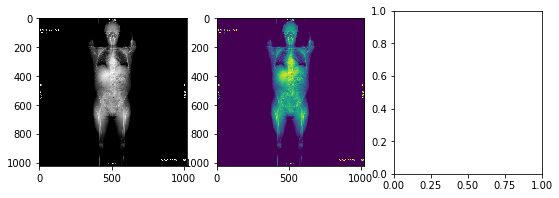

In [4]:
image = rgb2grey(make_square(selector.value))

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(132)
plt.imshow(image) 
plt.subplot(133)
plt.show()


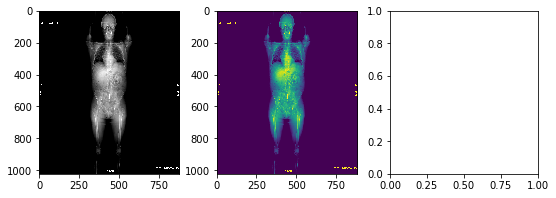

In [6]:
image = rgb2grey(io.imread(selector.value))

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(132)
plt.imshow(image) 
plt.subplot(133)
plt.show()

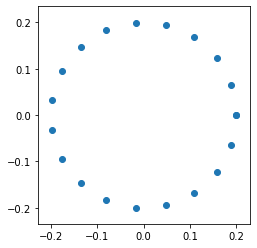

In [7]:

def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles
r = [0.2] # promień okręgu
n = [ 20] #nasze n
circles = circle_points(r, n)
fig, ax = plt.subplots()
for circle in circles:
    ax.scatter(circle[:, 0], circle[:, 1])
ax.set_aspect('equal')
plt.show()